Chelsea Zackey

CIS 5526: HW 3 Part 2

10/1/2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

**Soln 1**: 
**(a)** Letting $\mathbf{Q} = \big(\begin{smallmatrix} 3 & 2 \\ 2 & 2\end{smallmatrix}\big), \; \mathbf{b} = \big(\begin{smallmatrix} -5\\ 0\end{smallmatrix}\big),$ and $c = 6$, we note that 

%%latex
\begin{align*}
\mathbf{x^TQx}+\mathbf{bx}+c &= \begin{pmatrix}x_1 & x_2\end{pmatrix} \begin{pmatrix} 3 & 2 \\ 2 & 2\end{pmatrix}\begin{pmatrix}x_1 \\ x_2\end{pmatrix}+\begin{pmatrix}-5 & 0\end{pmatrix}\begin{pmatrix}x_1 \\ x_2\end{pmatrix}+6\\
&= x_1(3x_1 + 2x_2)+x_2(2x_1+2x_2)-5x_1+6\\
&= 3x_1^2+2x_2^2+4x_1x_2-5x_1+6\\
&= f(\mathbf{x}).
\end{align*}

As our choice of $\mathbf{Q}$ is symmetric, our results from problems 1-3 apply, namely that
$$\nabla f(\mathbf{x}) = 2\mathbf{Qx}+\mathbf{b}.$$
As $\mathbf{Q}$ is also invertible ($\mathbf{Q}^{-1}$ is solved for in the image below), we can solve for $x^* = -\frac{1}{2}\mathbf{Q}^{-1}\mathbf{b}$, which yields the unique solution 
$$x^* = -\frac{1}{2}\mathbf{Q}^{-1}\mathbf{b} = -\frac{1}{2}\begin{pmatrix} 1 & -1 \\ -1 & \frac{3}{2}\end{pmatrix}\begin{pmatrix}-5 \\ 0\end{pmatrix}=\begin{pmatrix}\frac{5}{2} \\ \frac{-5}{2}\end{pmatrix}.$$

Verifying $\mathbf{Q}^{-1}$:
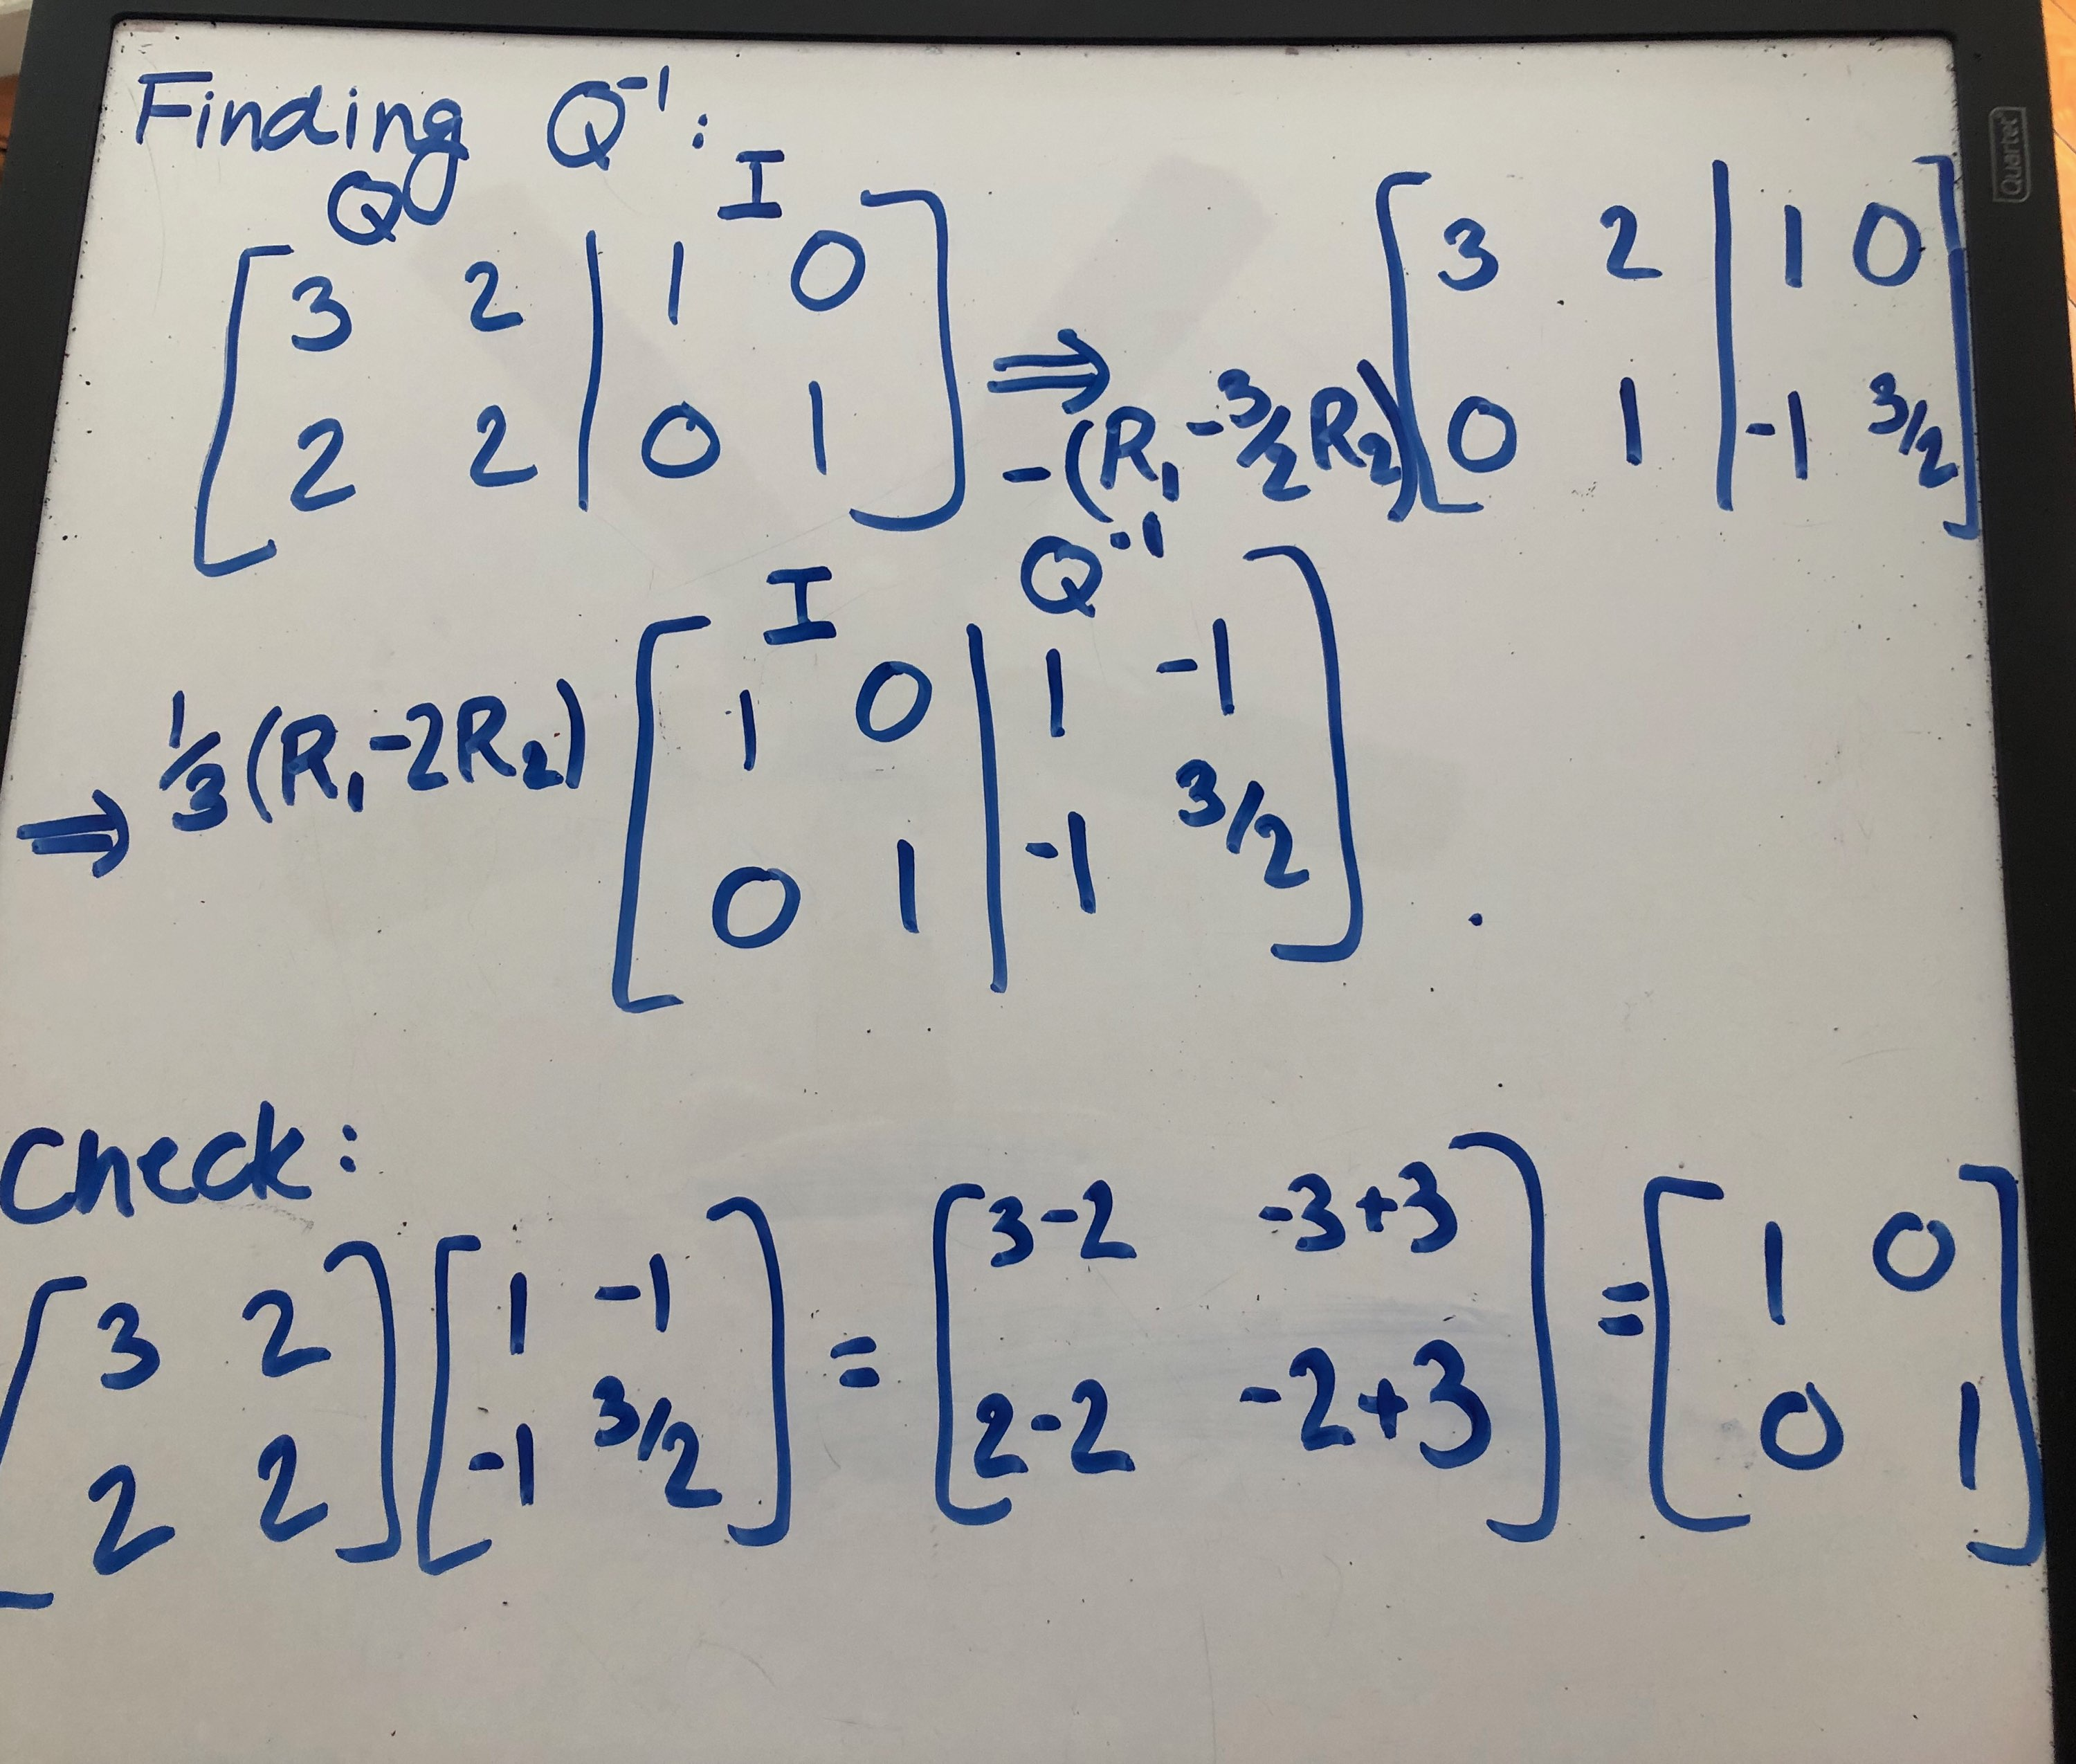

**(b)**: x^* appears to be a minimum (based on the provided hint).

**(c)** The update formula for each iteration of the gradient descent algorithm implemented below is $x = x-\alpha \nabla f(\mathbf{x}) = x-\alpha(2\mathbf{Qx}+\mathbf{b}) = x-\alpha\begin{pmatrix}6x_1+4x_2 - 10 \\ 4x_1+ 4x_2\end{pmatrix}$. 

In [28]:
#Code for Q1 on HW3

#Prepare plot figure for evolution of x per each alpha
#plt.figure()
#plt.figure(figsize=(6, 3))

def grad_f1(x):
# return 2x1 vector 2Qx+b from gradient formula derived in HW3 Q1
    Q = np.matrix('3 2; 2 2')
    b = np.matrix('-5; 0')
    return 2*Q*x+b
    
def GD_hw3_1(x0, alpha, iter):
# Given starting point x0, number of iterations iter, and hyperparam alpha,
# return x yielding min value for f'(x) using from gradient descent 
#formula derived in HW3 Q1   
    x = x0 #starting point; assumes x0 is 2x1 np.matrix 
    for i in range(iter):
        x = x-alpha*grad_f1(x)
    #plot evolution of x for this alpha
    
    return x    

x0 = np.matrix('0;0')
iter = 1000
for alph in [0.0001, 0.001, 0.01, 0.1, 1, 10, 0.05]:
    alpha = alph
    xf = GD_hw3_1(x0, alpha, iter)
    print("\nalpha:", alpha)
    print("x_final:")
    print(xf)


alpha: 0.0001
x_final:
[[ 0.38511706]
 [-0.07308664]]

alpha: 0.001
x_final:
[[ 1.60179658]
 [-1.3496757 ]]

alpha: 0.01
x_final:
[[ 2.49967696]
 [-2.49958626]]

alpha: 0.1
x_final:
[[ 2.5]
 [-2.5]]

alpha: 1
x_final:
[[ 311572056133596720]
 [7755365983996209072]]

alpha: 10
x_final:
[[-1667897335682558544]
 [  262681674669546560]]

alpha: 0.05
x_final:
[[ 2.5]
 [-2.5]]


**(d)**: Though unable to figure out how to create subplots on a contour map via maplotlib, running the above code for alpha = \[0.0001, 0.001, 0.01, 0.1, 1, 10, 0.05\], we see that the most precise results are obtained when alpha is set to 0.1, 0.05, and 0.01, the first two values yielding exact results for x_final. Moreover, we see that values for alpha exceeding (and including) alpha = 1 lead to tremendous divergence in our values for x per each iteration due to overshooting. As for the values alpha = 0.001 and 0.0001, though we don't necessarily experience divergence in our values for x, we still conclude that these values for alpha yield step sizes that are too small for our algorithm to approach an accurate measure for x_final in just 1000 iterations. 

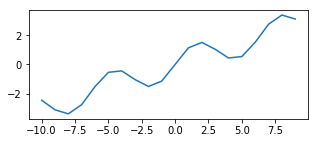


alpha: 1
x0: -5
x_final: -8.15867428798988


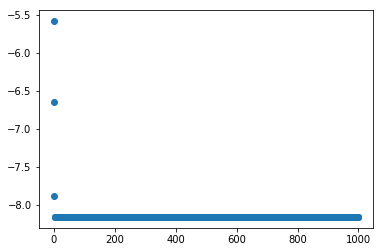

In [34]:
#Code for Q2 on HW3

# plot f(x) = sin(x)+0.3x
plt.figure(figsize=(5, 2))
x = np.arange(-10, 10)
y = np.sin(x)+0.3*x
plt.plot(x, y)
plt.show()

def f2_deriv(x):
# return derivative at x of function f(x) = sin(x)+0.3x in HW3 Q2
    return np.cos(x)+0.3
def GD_hw3_2(x0, alpha, iter):
# Given starting point x0, number of iterations iter, and hyperparam alpha,
# return x yielding min value for f'(x) using from gradient descent 
#formula derived in HW3 Q2     
    x = x0
    x1 = []
    step = []
    for i in range(iter):
        x = x-alpha*f2_deriv(x)
        x1.append(x)
        step.append(i)
    plt.scatter(step, x1)
    return x

#configure plot 
plt.clf()
#plt.figure(figsize=(5, 2))
#p, sc = plt.subplots()
#xx = np.arange(0, 1000, 100)
#yy = np.arange(-2, 2, 0.1)
#plt.plot(xx, yy)


# run algorithm
x0 = -5
iter = 1000
alpha = 1
xfinal = GD_hw3_2(x0, alpha, iter)
print("\nalpha:", alpha)
print("x0:", x0)
print("x_final: "+str(xfinal))
plt.show()

**Soln 2**: 
**(a)** Referring to the plot above for $x \in [-10, 10]$, it appears that $f'(x) = 0$ for 6 values of $x$ in this range. 

**(b)** The update formula for each iteration of the gradient descent algorithm implemented above is $x = x- \alpha (\cos(x)+0.3)$. 

**(c)**: Our function for gradient descent in this setting has been ran on the two starting points x0 = 0 and x0 = -5 on values of alpha in \[1, 0.1, 0.01\]. Based on the images below plotting the evolution of x per each iteration for each of these 6 scenarios, we note that all outcomes have led to a final value of x that yielded approximately a minimum value for $f$ with negligible differences in accuracy. What is most interesting is that when alpha = 1, this is accomplished in at most a handful of iterations, whereas setting alpha = 0.1 and alpha = 0.01 appears to approach a final x value yielding a min for $f$ in an exponential and linear fashion, respectively. We note, however, that the success of these trials may be heavily reliant upon the fact that each starting point selected was relatively close to a local min in our graph, which may also explain why we have not detected any major divergence in our values for x. 

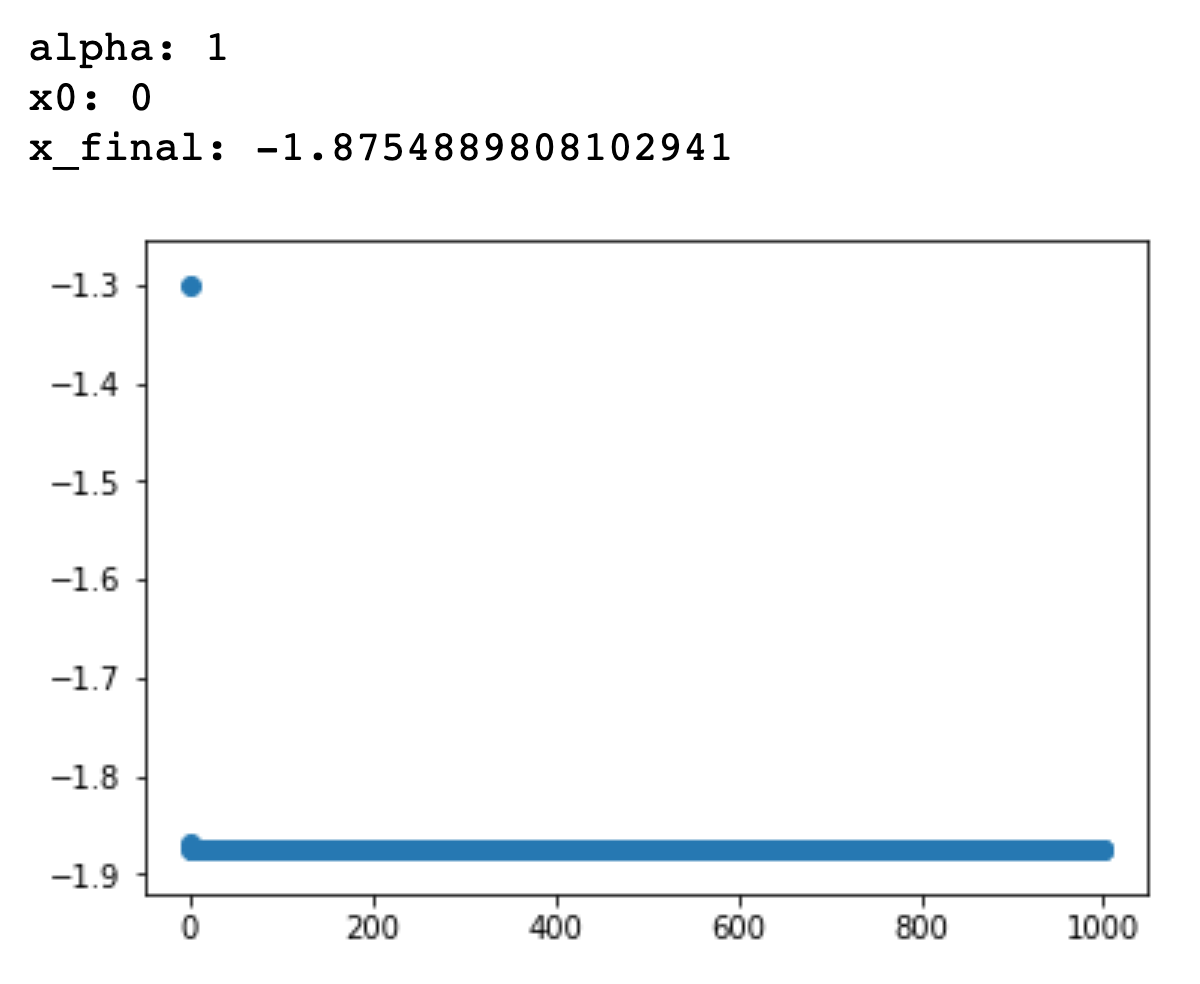

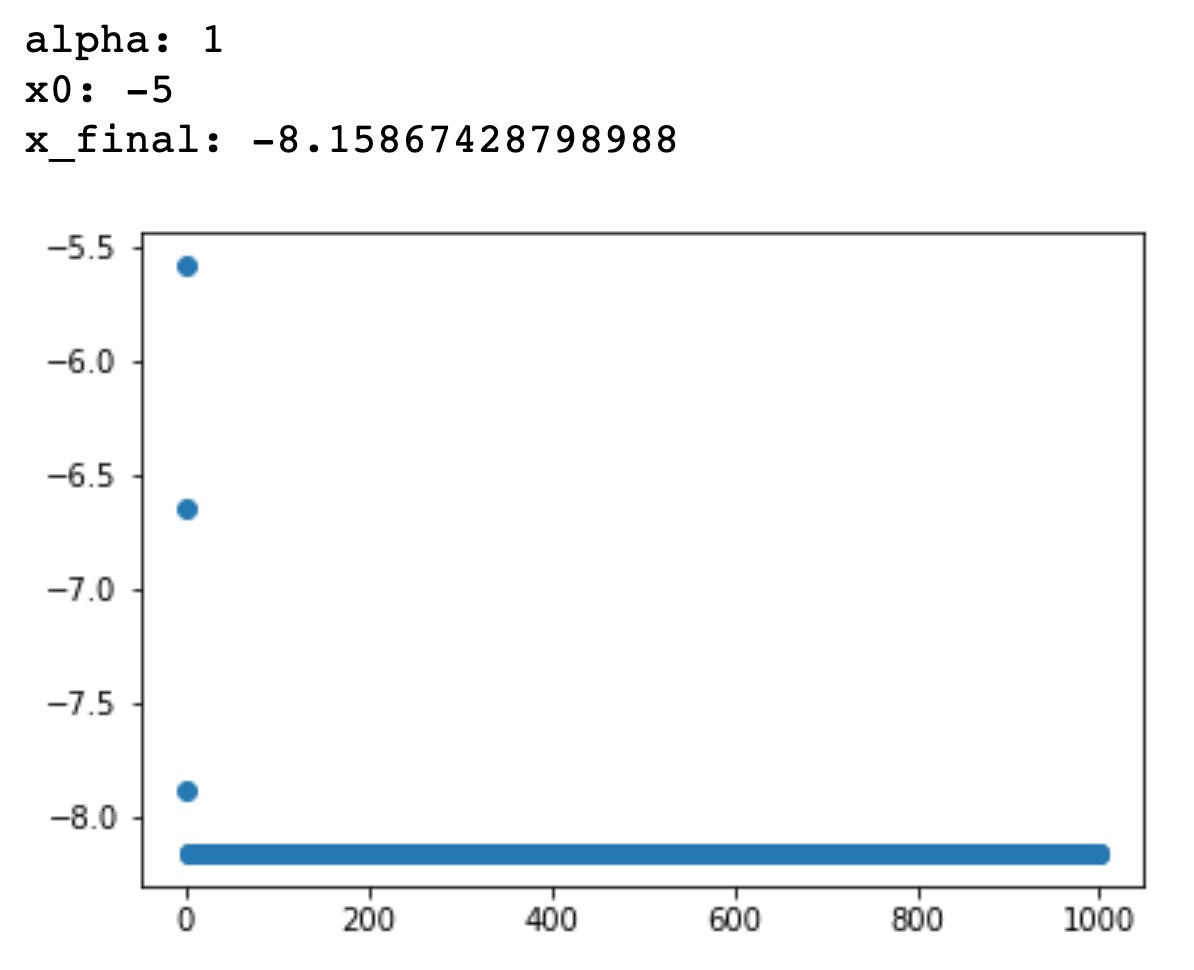

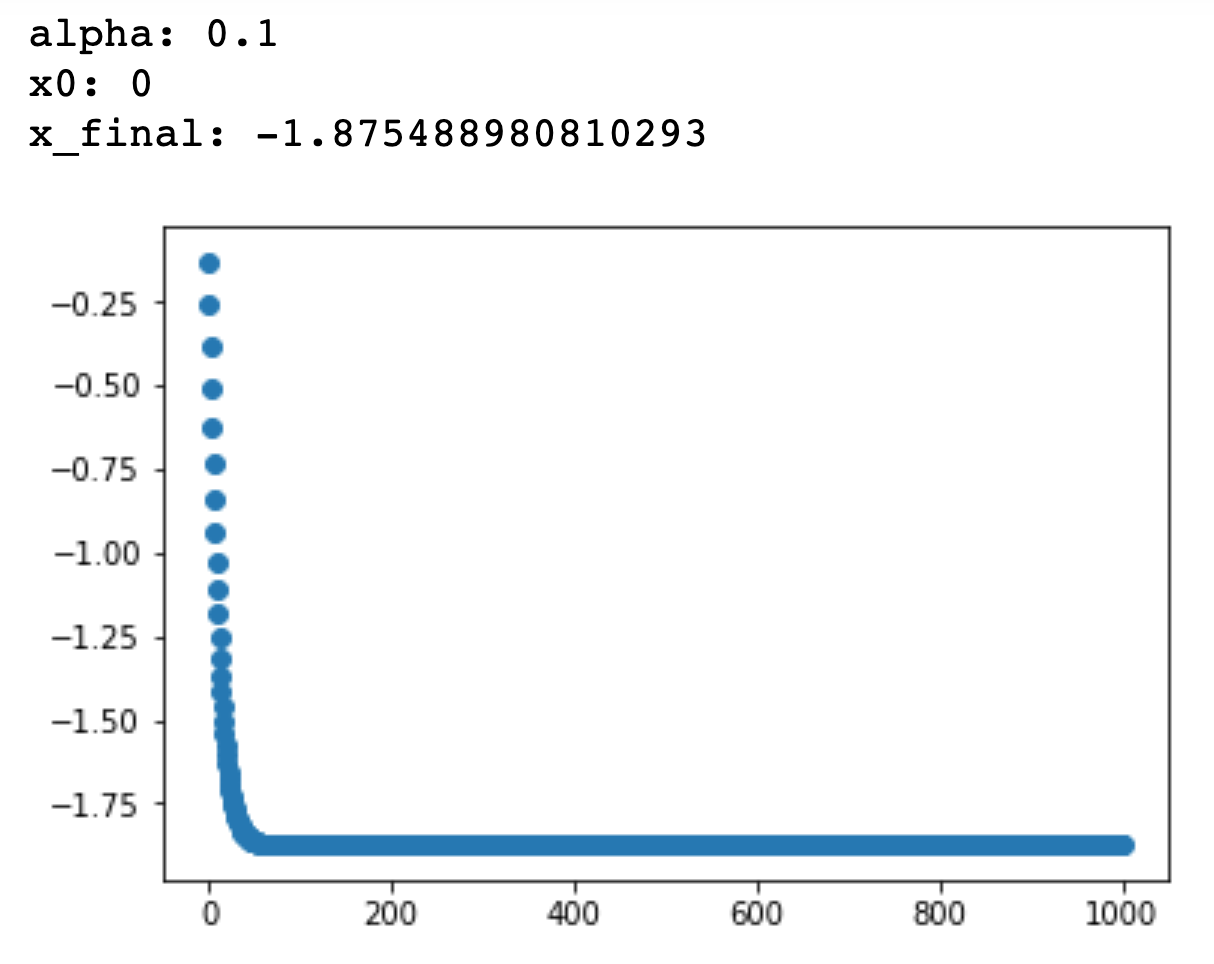

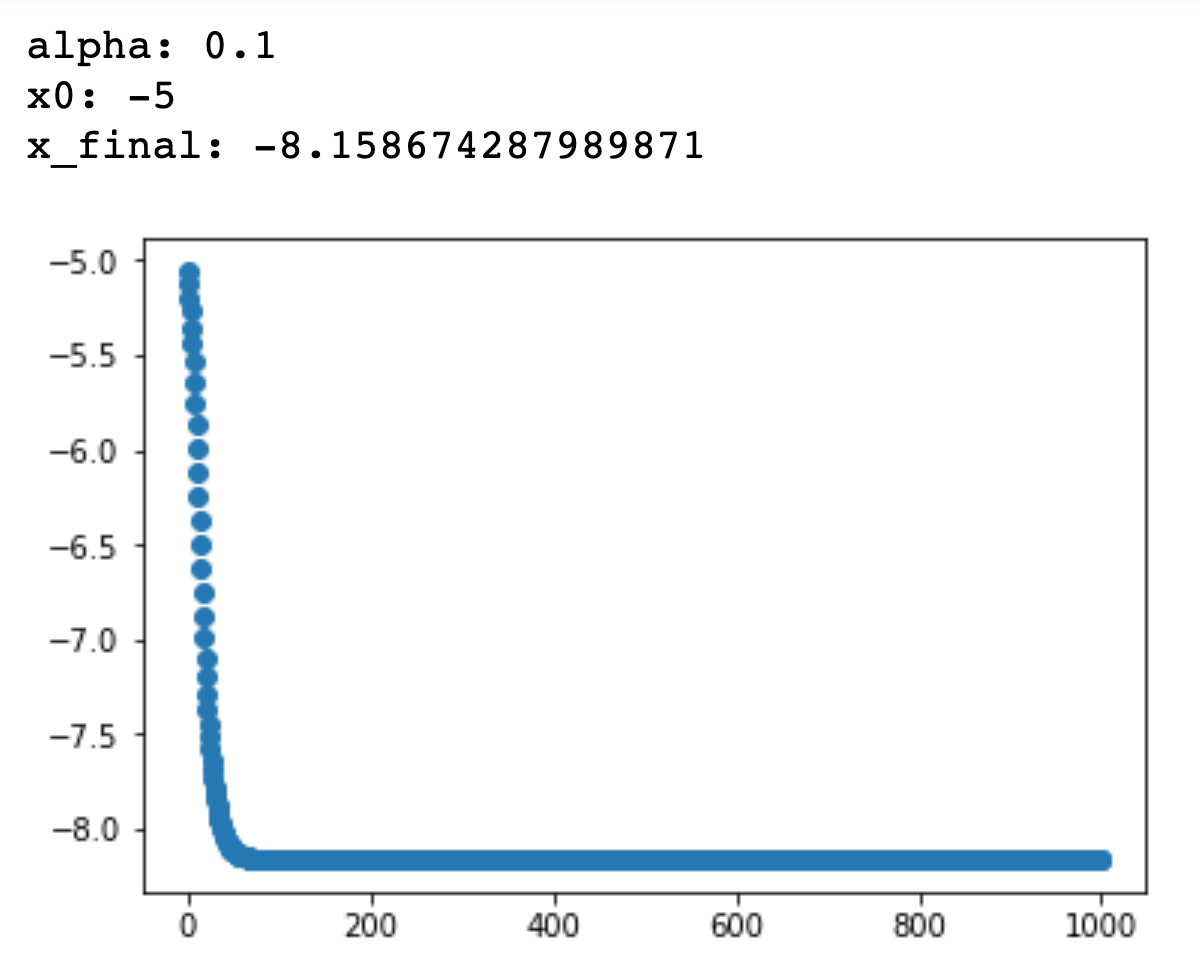

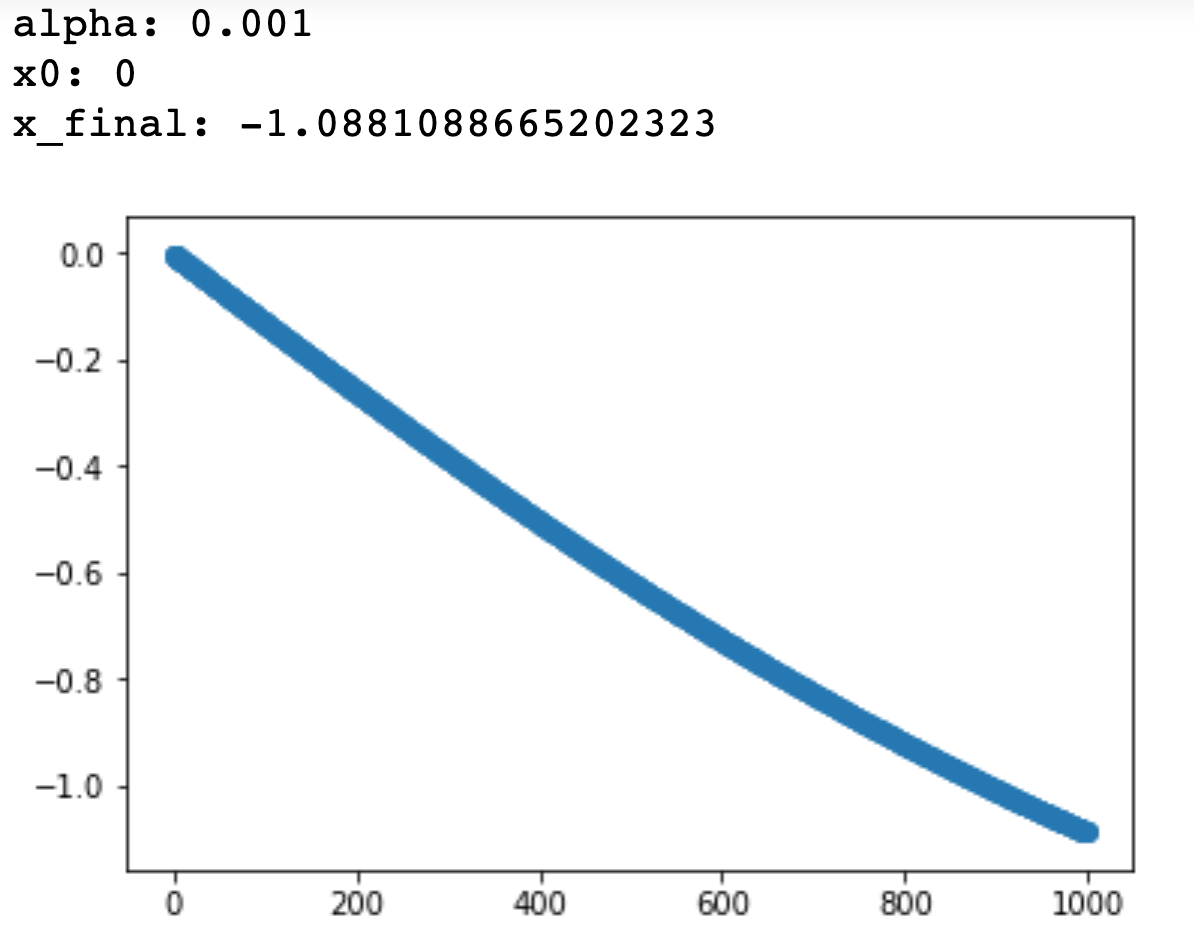

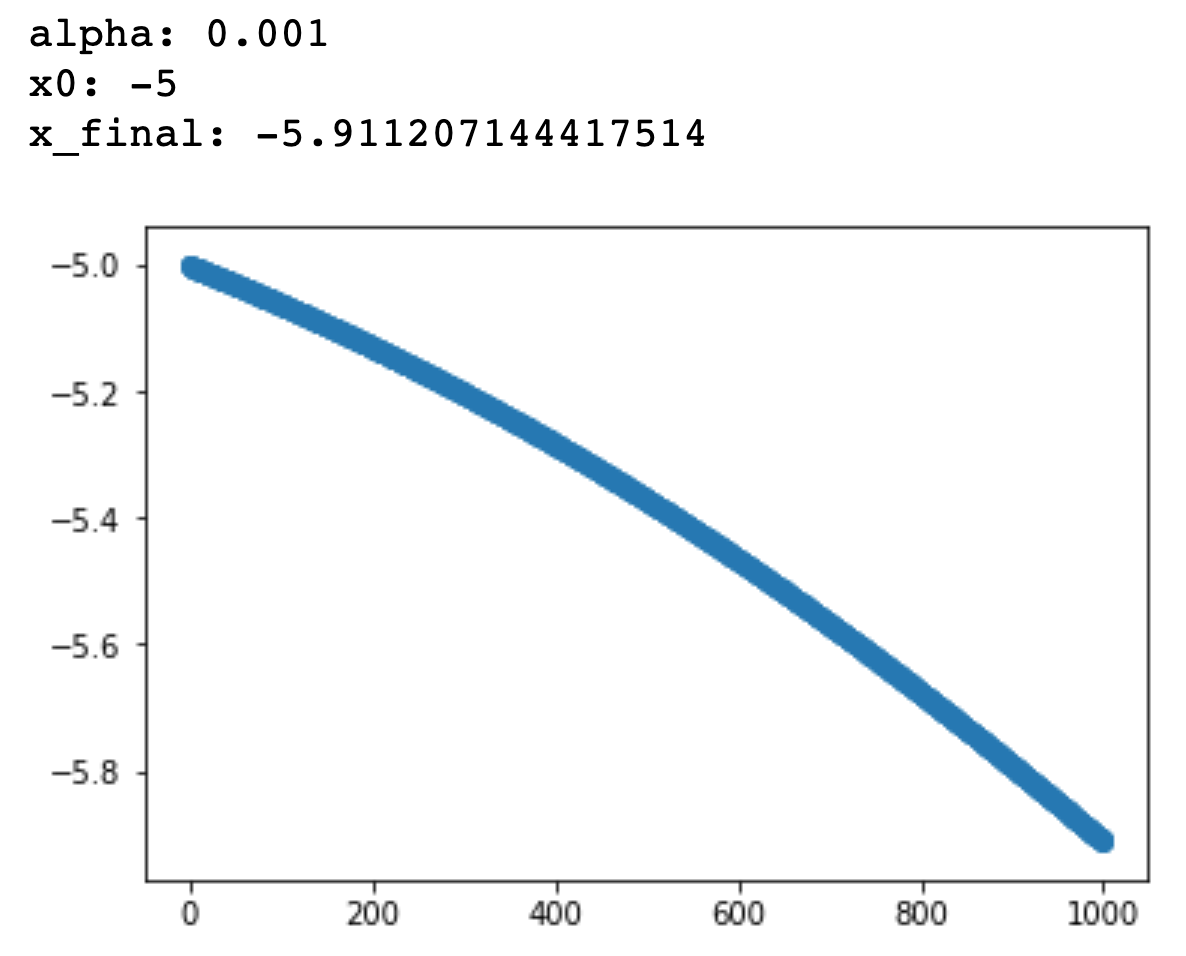